# Progression analyser

## Import data

In [65]:
import pandas as pd
import os
import re

path = "./datasets"
files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

def getDayNumber(regex: str, filename: str):
    

    match = re.search(r"databootcampd(\d+)", filename)

    if match:
        number = match.group(1)
        return number
    else:
        print("No match")

RESULTS = {}
for file in files:
    data = pd.read_csv(f"{path}/{file}", sep=";")
    logins = data.get("login").values
    percentage = data.get("test %").values
    dayResults = []
    dayNumber = f"day{getDayNumber(r"databootcampd(\d+)", file)}"
    
    for index, login in enumerate(logins):
        dayResults.append((login, percentage[index]))

    RESULTS[dayNumber] = dayResults
       


## Display average score per day

[np.float64(50.300000000000004), np.float64(35.34090909090909), np.float64(11.387500000000001), np.float64(24.104166666666668), np.float64(28.266666666666666), np.float64(27.708333333333332), np.float64(22.225000000000005), np.float64(31.620833333333326), np.float64(32.204166666666666)]


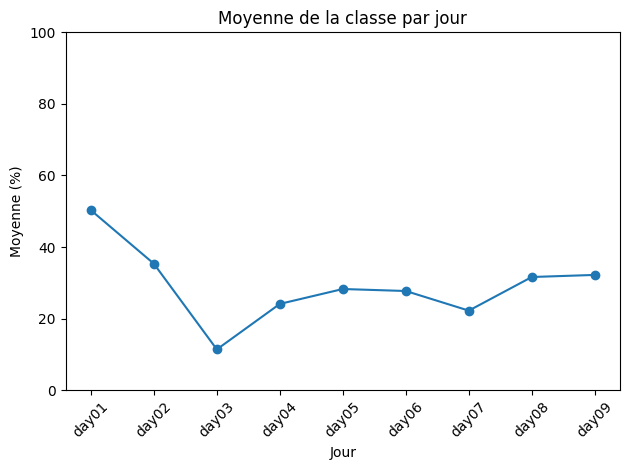

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Moyenne par jour
days = sorted(RESULTS.keys())
averages = []

for day in days:
    scores = [score for _, score in RESULTS[day]]
    averages.append(np.mean(scores))

plt.figure()
plt.plot(days, averages, marker="o")
plt.title("Moyenne de la classe par jour")
plt.xlabel("Jour")
plt.ylabel("Moyenne (%)")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Display average progression per personne per day

In [ ]:
import os
import re
import matplotlib.pyplot as plt


OUTPUT_DIR = "plots_students"
os.makedirs(OUTPUT_DIR, exist_ok=True)


def day_sort_key(day):
    m = re.search(r"(\d+)", day)
    return int(m.group(1)) if m else 999

days = sorted(RESULTS.keys(), key=day_sort_key)


day_maps = {day: dict(RESULTS[day]) for day in days}

students = sorted({
    email
    for day in days
    for email, _ in RESULTS[day]
})


for email in students:
    scores = [day_maps[day].get(email, 0) for day in days]

    plt.figure()
    plt.plot(days, scores, marker="o")
    plt.title(f"Progression - {email}")
    plt.xlabel("Jour")
    plt.ylabel("Score (%)")
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.tight_layout()


    safe_email = re.sub(r"[^a-zA-Z0-9_.-]", "_", email)
    filepath = os.path.join(OUTPUT_DIR, f"{safe_email}.png")

    plt.savefig(filepath, dpi=150)
    plt.close()

print("Images générées dans le dossier :", OUTPUT_DIR)

✅ Images générées dans le dossier : plots_students


Top 3 Hardest days

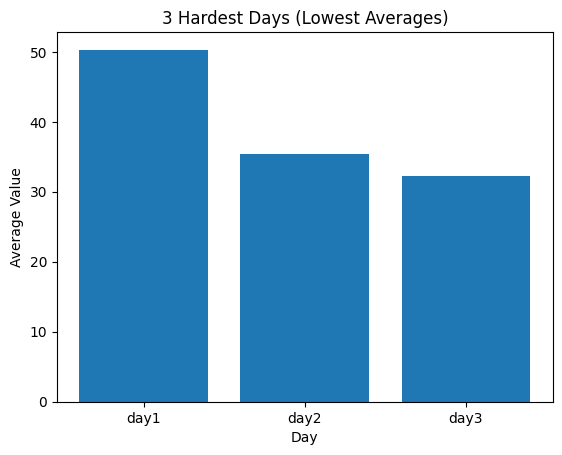

In [ ]:
hardestDays = sorted(enumerate(averages), key=lambda x: x)[:3]



indices, values = zip(*hardestDays)
labels = [f'day{i+1}' for i in indices]

plt.bar(labels, values)
plt.xlabel("Day")
plt.ylabel("Average %")
plt.title("Top 3 hardest days (Lowest Averages)")
plt.show()

## DUMP

In [68]:
import json
json.dumps(RESULTS)


'{"day01": [["alexia.regnier@epitech.eu", 100.0], ["alix.ducci@epitech.eu", 42.9], ["aymeric.deroudilhe@epitech.eu", 42.9], ["bastien.lecomte@epitech.eu", 42.9], ["celia.marie-louise@epitech.eu", 42.9], ["elyes.ouahrani@epitech.eu", 57.1], ["ethan.cathebras@epitech.eu", 42.9], ["gautier.oudart@epitech.eu", 57.1], ["idriss.abdellaoui@epitech.eu", 57.1], ["ilies.mammar-tayeb@epitech.eu", 42.9], ["lila.hamri@epitech.eu", 57.1], ["loic.ruyssen@epitech.eu", 71.4], ["lorenzo.philippon@epitech.eu", 100.0], ["louis.savon@epitech.eu", 21.4], ["marc-aurele.homand@epitech.eu", 85.7], ["mathias.rodrigues@epitech.eu", 57.1], ["matteo.castronovo@epitech.eu", 42.9], ["mohamed-amin.belhedi@epitech.eu", 0.0], ["mohamed-yasin.belhedi@epitech.eu", 0.0], ["pierre.untersinger@epitech.eu", 42.9], ["thersan.jean@epitech.eu", 42.9], ["ugo2.cani@epitech.eu", 57.1], ["valentin.barrois@epitech.eu", 42.9], ["yann.rochas@epitech.eu", 57.1]], "day02": [["alexia.regnier@epitech.eu", 100.0], ["alix.ducci@epitech.eu",